# DAML notes

## 1. Data modalities

<hr style="border:2px solid black"> </hr>

## 1.1 What are these notebooks for?

Most weeks of the course have a lecture and a lab. In the lecture you are introduced to material, and in the lab you use Python to solve problems using that material.

These notebooks act as a bridge between the lecture and the lab. Each one summarises the lecture, and provides code examples as a starting point for writing your own code. In the first few notebooks, I will import packages on-the-fly as needed so you can see when they are required. In the later notebooks, and in the labs, imports will be done at the start. 

These notebooks start off relatively light for the first few weeks and get heavier when we get to the machine learning part of the course (Week 5 onwards).

The first lecture was slightly unusual, in that it was also an introduction to the course. I am not going to summarise the introduction (whatever that would entail) but I am going to look at different data modalities, and how you can process them in Python.

## 1.2 Data modalities

### 1.2.1 Time series 

In time series data, we have some quantity we care about at different points in time.   We are going to consider the value of the pound (GBP) vs. the dollar (USD). A lot of the time we import our data from spreadsheets (e.g. excel files, CSV files) and this is no exception!

I have already downloaded the spreadsheet containing GBP vs. USD values from 04/10/2021 to 03/10/2022 from [Yahoo Finance](https://finance.yahoo.com/quote/GBPUSD%3DX%3B/history?period1=1633265701&period2=1664801701&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true) which is in CSV format. 

How do we get this into Python? There is a fantastic data analysis library called [pandas](https://pandas.pydata.org) which does all the hard work for us.

In [1]:
# Import pandas for dataframes
import pandas as pd

# Read CSV into dataframe using pandas
df = pd.read_csv("data/GBPUSD=X.csv")

# Show dataframe
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-10-04,1.357092,1.363977,1.353363,1.357092,1.357092,0
1,2021-10-05,1.360766,1.365001,1.358585,1.360748,1.360748,0
2,2021-10-06,1.362565,1.363141,1.354463,1.362769,1.362769,0
3,2021-10-07,1.359268,1.363736,1.357184,1.359213,1.359213,0
4,2021-10-08,1.361953,1.365374,1.358493,1.362027,1.362027,0
...,...,...,...,...,...,...,...
256,2022-09-27,1.077006,1.083541,1.073849,1.077284,1.077284,0
257,2022-09-28,1.072846,1.083964,1.054163,1.072754,1.072754,0
258,2022-09-29,1.083459,1.106562,1.076449,1.083600,1.083600,0
259,2022-09-30,1.116184,1.123394,1.102682,1.116944,1.116944,0


Let's say we care about the closing value at the end of each day. This is in the `Close` column. We can plot this against `Date` using a few lines of code.

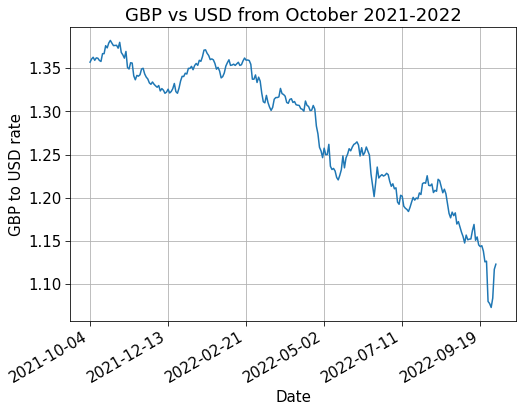

In [2]:
# matplotlib for plotting
import matplotlib.pyplot as plt

# This makes matplotlib output nice figures without much tweaking
plt.rcParams.update(
    {
        "lines.markersize": 10,  # Big points
        "font.size": 15,  # Larger font
        "xtick.major.size": 5.0,  # Bigger xticks
        "ytick.major.size": 5.0,  # Bigger yticks
    }
)

# Plotting code
fig, ax = plt.subplots(figsize=[8,6])
ax.plot(df["Date"], df["Close"])
ax.set_xlabel('Date')
ax.set_ylabel('GBP to USD rate')
ax.set_title('GBP vs USD from October 2021-2022')

# Add a grid
ax.grid()

# Formatting specifically for date strings
fig.autofmt_xdate()

# A hacky way of showing a subset of x ticks
dates = df["Date"].to_numpy()
ax.set_xticks([dates[i] for i in range(0, len(dates), 50)])

There is an alternative way to do this just in pandas. Notice that each row has an index (0,1,2,3...). We can turn the `Date` column into a datetime format, and then make that the index instead. We can then just call `.plot` on the dataframe to plot a column against the date index.

Let's do all this on a copy of the original dataframe:

<AxesSubplot:xlabel='Date'>

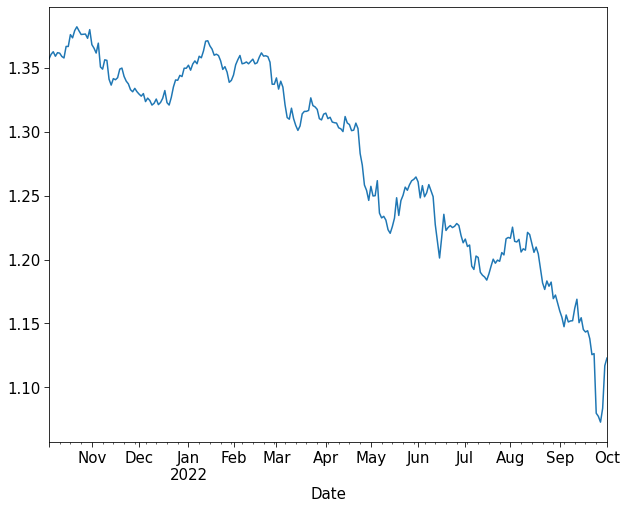

In [3]:
df2 = df.copy()
df2['Date'] = pd.to_datetime(df2['Date'])
df2 = df2.set_index("Date")
df2["Close"].plot(figsize=[10,8])

We can also take a column and convert it into a numpy array. Let's take the `Close` column, convert it into an array, and find its mean. (This can be done directly in pandas but is for illustration!)

In [4]:
# import numpy for arrays
import numpy as np

close_array = df["Close"].values
close_mean = np.mean(close_array)
print(f"The mean close value is {close_mean:3f}")

The mean close value is 1.280153


### 1.2.2 Tabular data

We actually did just extract our time series data from tabular data! Tabular data will make up the vast majority of data you look at in this course. It is very common in the real world. 

Let's say we want the list of dates for which the opening value of GBP vs. USD was greater than 1.3.

First, we can see which rows this corresponds to:

In [5]:
valid_rows = df["Open"] > 1.3
print(valid_rows)

0       True
1       True
2       True
3       True
4       True
       ...  
256    False
257    False
258    False
259    False
260    False
Name: Open, Length: 261, dtype: bool


We can then use this boolean array to filter out the appropriate dates.

In [6]:
df["Date"][valid_rows]

0      2021-10-04
1      2021-10-05
2      2021-10-06
3      2021-10-07
4      2021-10-08
          ...    
140    2022-04-18
141    2022-04-19
142    2022-04-20
143    2022-04-21
144    2022-04-22
Name: Date, Length: 145, dtype: object

If we want to get the rows that correspond to dates in the year 2022, we can use the following to get a Boolean array, and filter with it.

In [7]:
valid_rows = df["Date"].str.contains("2022")
df[valid_rows]

,Date,Open,High,Low,Close,Adj Close,Volume
65,2022-01-03,1.352228,1.353180,1.343274,1.352228,1.352228,0
66,2022-01-04,1.348279,1.355675,1.346076,1.348327,1.348327,0
67,2022-01-05,1.353052,1.357331,1.352265,1.353143,1.353143,0
68,2022-01-06,1.355546,1.355748,1.349109,1.355565,1.355565,0
69,2022-01-07,1.353400,1.358345,1.352942,1.353363,1.353363,0
...,...,...,...,...,...,...,...
256,2022-09-27,1.077006,1.083541,1.073849,1.077284,1.077284,0
257,2022-09-28,1.072846,1.083964,1.054163,1.072754,1.072754,0
258,2022-09-29,1.083459,1.106562,1.076449,1.083600,1.083600,0
259,2022-09-30,1.116184,1.123394,1.102682,1.116944,1.116944,0


### 1.2.3 Images

PIL (the Python imaging library) lets us read in images, as well as perform high-level manipulations. We will load in a JPEG of a dog, and also print the image size in pixels.

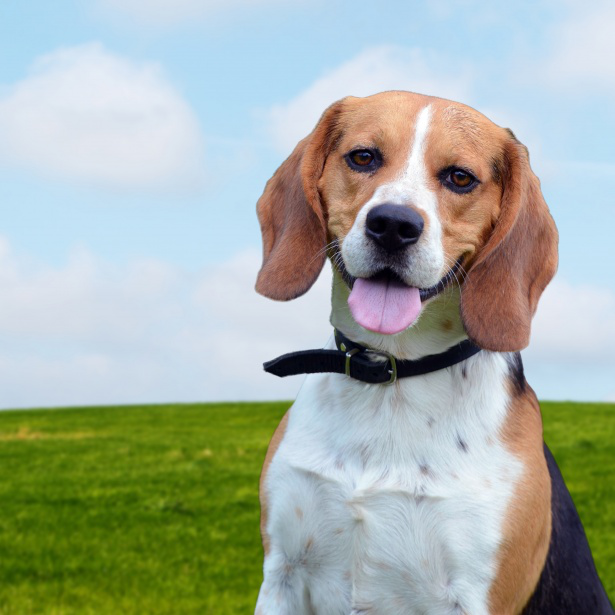

The image has a size of (615, 615)


In [8]:
# Image from PIL lets us manipulate images
from PIL import Image

# Read image
image = Image.open("data/dog.jpg")

# Use Juypter's inbuilt display function
display(image)
print(f"The image has a size of {image.size}")

We can downsize the image...

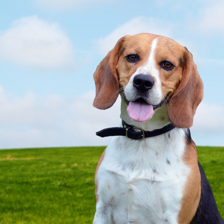

In [9]:
image = image.resize((224, 224))
display(image)

and rotate it!

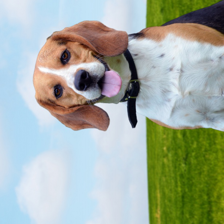

In [10]:
image = image.rotate(90)
display(image)

Recall from the lectures that an image is actually stored as a 3D array (height by width by colour channel). We can see this if we convert our image into a numpy array.

In [11]:
# Convert image into a numpy array
data_im = np.array(image)

# See what the array looks like and print its shape
print(data_im)
print(f"the image in numpy has shape {data_im.shape}")

[[[217 229 243]
  [217 229 243]
  [218 229 242]
  ...
  [ 47  66  24]
  [ 50  57  52]
  [ 57  56  73]]

 [[216 230 243]
  [217 230 243]
  [217 229 242]
  ...
  [ 53  57  71]
  [ 60  60  83]
  [ 61  57  81]]

 [[216 230 243]
  [216 230 243]
  [216 229 243]
  ...
  [ 60  58  82]
  [ 55  53  78]
  [ 53  50  71]]

 ...

 [[171 214 239]
  [170 214 240]
  [170 216 242]
  ...
  [114 131  18]
  [110 128  15]
  [101 119   5]]

 [[170 214 239]
  [170 215 240]
  [170 217 242]
  ...
  [111 128  18]
  [113 128  15]
  [110 126  12]]

 [[170 215 240]
  [170 216 240]
  [171 217 241]
  ...
  [ 94 110   6]
  [112 123  12]
  [124 135  22]]]
the image in numpy has shape (224, 224, 3)


Let's manually set the red colour channel to zero for all pixels and see what happens.

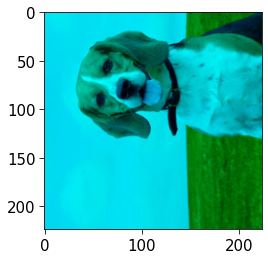

In [12]:
# Create a copy of our image array
data_nored = data_im.copy()

# Set all values in the red channel to 0
data_nored[:, :, 0] = 0

# Now we have a numpy array we have to use matplotlib to display it
plt.imshow(data_nored)

Without any red, the blue and green have got more ... blue and green. This wasn't the most obvious manipulation! Try some others by changing the code above.

<hr style="border:2px solid black"> </hr>

#### Written by Elliot J. Crowley and &copy; The University of Edinburgh 2022-24